# Parameter estimation by optimization

### How often do we get no-hitters?

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nohitter_times = np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

In [4]:
np.random.seed(42)

In [6]:
tau = np.mean(nohitter_times)

In [7]:
inter_nohitter_time = np.random.exponential(tau, 1000000)

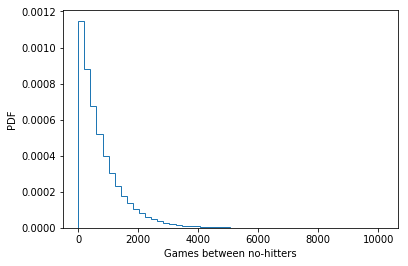

In [8]:
_ = plt.hist(inter_nohitter_time, bins=50, density=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')
plt.show()

In [9]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

### Do the data follow our story?

In [10]:
x, y = ecdf(nohitter_times)
x_theor, y_theor = ecdf(inter_nohitter_time)

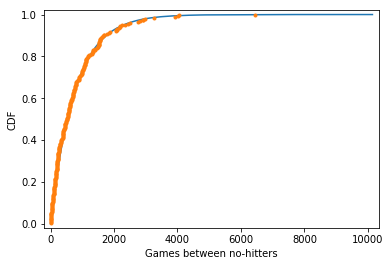

In [11]:
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

plt.show()

### How is this parameter optimal?

In [12]:
np.random.seed(42)

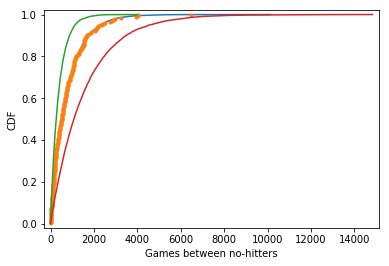

In [15]:
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

sample_half = np.random.exponential(tau/2, 10000)
sample_double = np.random.exponential(tau*2, 10000)

x_half, y_half = ecdf(sample_half)
x_double, y_double = ecdf(sample_double)

_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

plt.show()

### EDA of literacy/fertility data

In [16]:
df = pd.read_csv('female_literacy_fertility.csv')

In [17]:
df.head()

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"
2,USA,NAM,99.0,2.077,"304,060,000"
3,Indonésie,ASI,88.8,2.132,"227,345,082"
4,Brésil,LAT,90.2,1.827,"191,971,506"


In [18]:
df['illiteracy'] = 100 - df['female literacy']

In [22]:
illiteracy = df['illiteracy'].values
fertility = df['fertility'].values

In [24]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

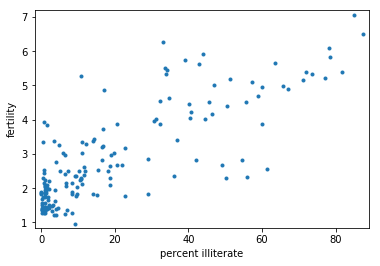

In [25]:
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')
plt.show()

In [26]:
pearson_r(illiteracy, fertility)

0.8041324026815344

In [27]:
np.corrcoef(illiteracy, fertility)

array([[1.       , 0.8041324],
       [0.8041324, 1.       ]])

### Linear regression

slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


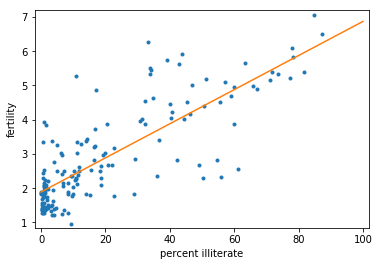

In [28]:
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

a, b = np.polyfit(illiteracy, fertility, deg=1)

print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

x = np.array([0,100])
y = a * x + b

_ = plt.plot(x, y)

plt.show()

### How is it optimal?

In [30]:
a_vals = np.linspace(0, 0.1, 200)
rss = np.empty_like(a_vals)

In [31]:
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility-a*illiteracy - b )**2)

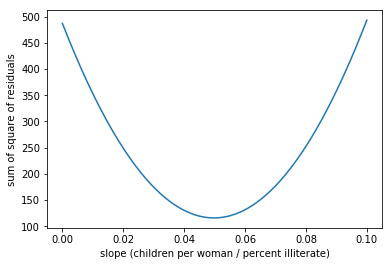

In [32]:
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

### Linear regression on appropriate Anscombe data

In [33]:
x = np.array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.])
y = np.array([  8.04,   6.95,   7.58,   8.81,   8.33,   9.96,   7.24,   4.26,
        10.84,   4.82,   5.68])

In [37]:
a, b = np.polyfit(x, y, deg=1)
a, b

(0.5000909090909095, 3.0000909090909076)

In [38]:
x_theor = np.array([3, 15])
y_theor = a*x_theor + b

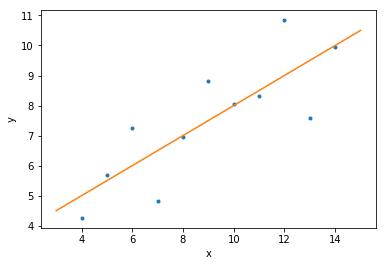

In [40]:
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Linear regression on all Anscombe data

In [54]:
df = pd.read_csv('anscombe.csv', header=[0, 1])
df.head()

0           1           2           3      
      x     y     x     y     x      y    x     y
0  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
1   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
2  13.0  7.58  13.0  8.74  13.0  12.74  8.0  7.71
3   9.0  8.81   9.0  8.77   9.0   7.11  8.0  8.84
4  11.0  8.33  11.0  9.26  11.0   7.81  8.0  8.47

In [76]:
for col in ['0', '1', '2', '3']:
    a, b = np.polyfit(df.xs(col, axis=1)['x'].values, df.xs(col, axis=1)['y'].values, deg=1)
    print('slope:', a, 'intercept:', b)

slope: 0.5000909090909095 intercept: 3.0000909090909076
slope: 0.5000000000000004 intercept: 3.000909090909089
slope: 0.4997272727272731 intercept: 3.0024545454545453
slope: 0.49990909090909064 intercept: 3.0017272727272735
